In [1]:
from analysis_3 import process_images
import cv2

#path = '/home/lionfish/Documents/Research/bee/experiments/high brad 1/20160617_202529_improved_reflector_and_camera_exposure_reduced_and_cloudy/unit0/00002/'
#noflash = path+'IMG_3643.JPG'
#flash = path+'IMG_3644.JPG'

path = '/home/lionfish/Documents/Research/bee/experiments/high brad 1/20160617_200528_just_reflector/unit0/00000/'
noflash = path+'IMG_3621a.JPG'
flash = path+'IMG_3622a.JPG'

imgs = []
img = cv2.imread(noflash,0)
#img = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
imgs.append(img)

img = cv2.imread(flash,0)
#img = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
imgs.append(img)

In [2]:
import numpy as np

# Initiate SIFT detector
sift = cv2.SIFT()

# find the keypoints and descriptors with SIFT
kps = []
des = []
for i,im in enumerate(imgs):
    k, d = sift.detectAndCompute(im,None)
    kps.append(k)
    des.append(d)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des[0],des[1],k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

MIN_MATCH_COUNT = 5
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kps[0][m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kps[1][m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None

In [3]:
margin = 20
rows,cols = imgs[0].shape #TODO GET RIGHT IMAGE!
out = cv2.warpPerspective(imgs[0], M, (cols,rows))
result = out*1.0 - imgs[1]*1.0
result = result[margin:-margin,margin:-margin]


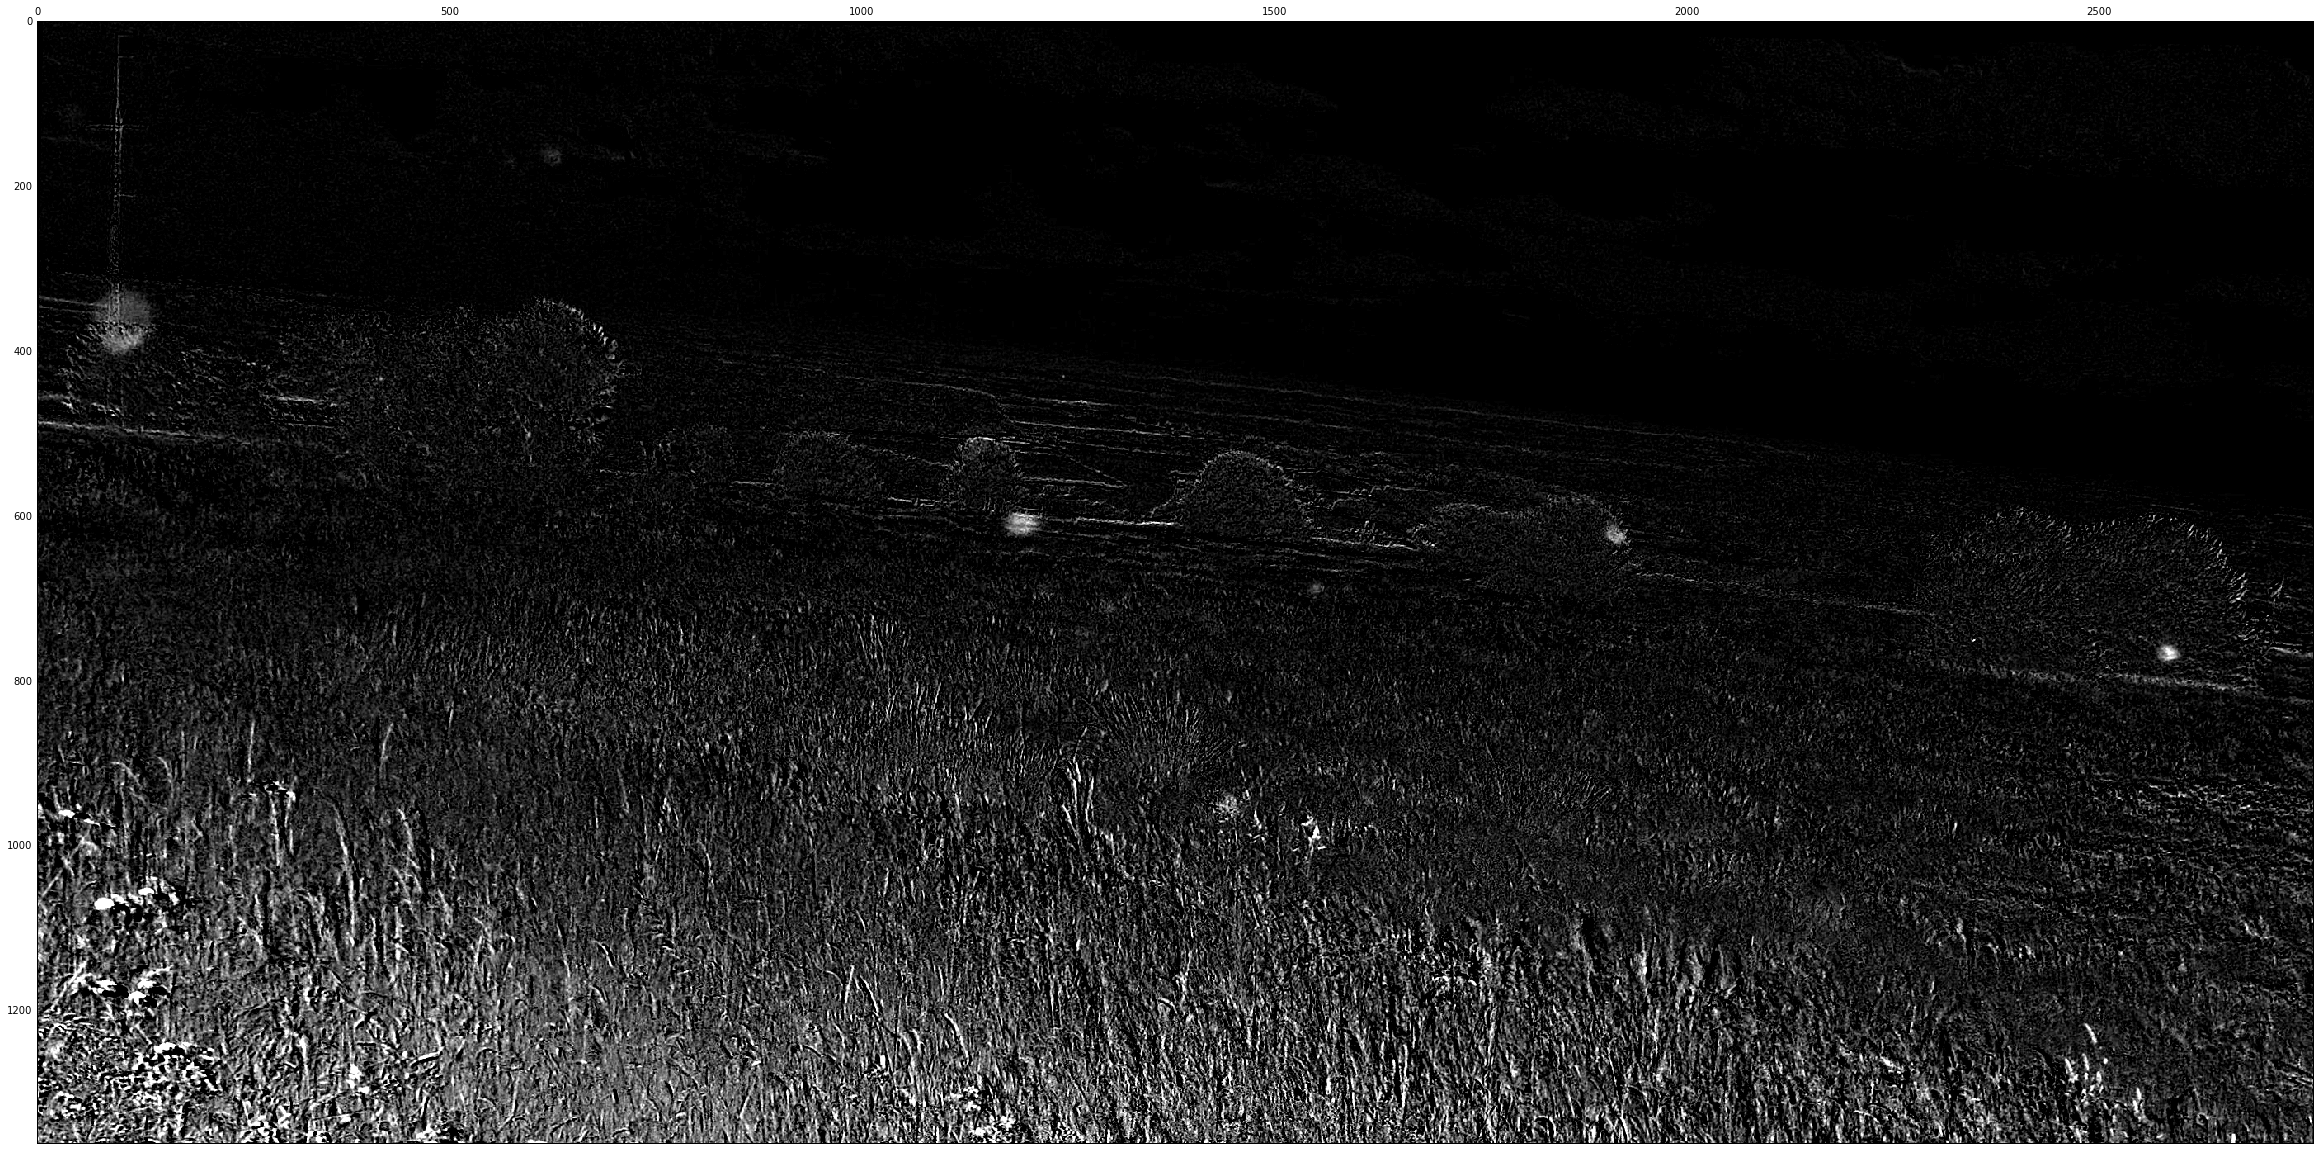

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(result,cmap='gray', clim=[0,60])
#plt.xlim([1900,2900])
#plt.ylim([300,900])
fig = plt.gcf()
r = result.shape
fig.set_size_inches(r[0]*0.03,r[1]*0.03)

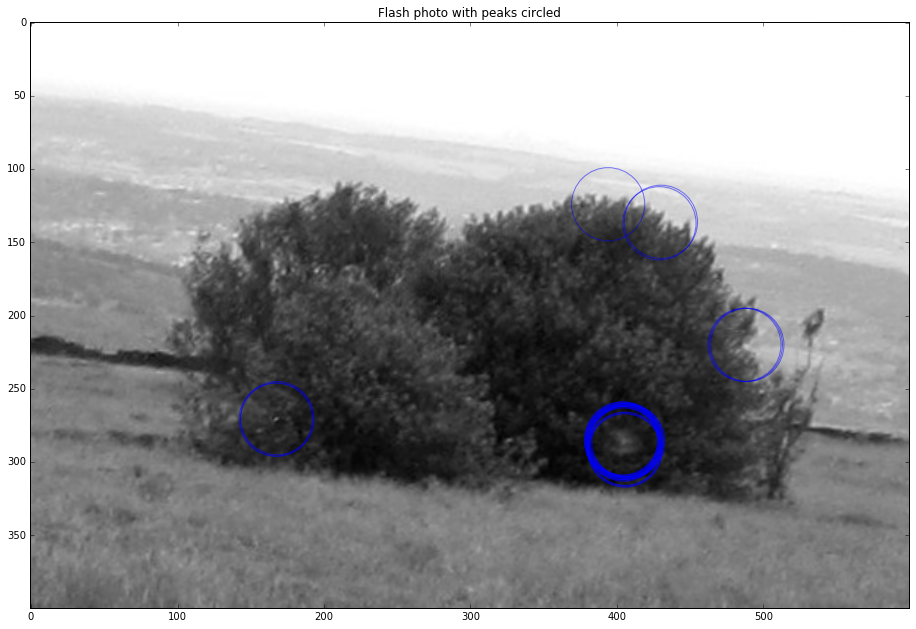

In [38]:
xs,ys = np.where(result>60)
xs += margin
ys += margin



plt.figure()
offsets = [2200,500]
plt.imshow(out[offsets[1]:offsets[1]+400,offsets[0]:offsets[0]+600],cmap='gray')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig = plt.gcf()
for x,y in zip(xs,ys):
    if x<1000:
        circle=plt.Circle((y-offsets[0],x-offsets[1]),25,ec='b',fc='none',alpha=0.5)
        fig.gca().add_artist(circle)
plt.title('Flash photo with peaks circled')

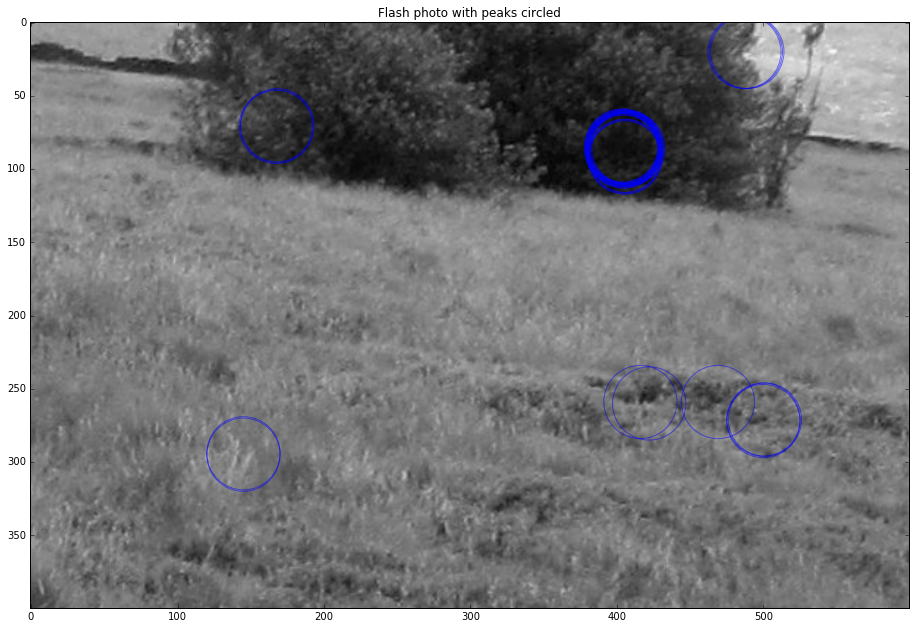

In [39]:
plt.figure()
offsets = [2200,700]
plt.imshow(imgs[1][offsets[1]:offsets[1]+400,offsets[0]:offsets[0]+600],cmap='gray')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig = plt.gcf()
for x,y in zip(xs,ys):
    if x<1000:
        circle=plt.Circle((y-offsets[0],x-offsets[1]),25,ec='b',fc='none',alpha=0.5)
        fig.gca().add_artist(circle)
plt.title('Flash photo with peaks circled')